In [1]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
from thinkdsp import UncorrelatedGaussianNoise

def analyze1(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.linalg.solve(M, ys)
    return amps

def analyze2(ys, fs, ts):
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = M.dot(ys) / 2
    return amps

def dct_iv(ys):
    N = len(ys)
    ts = (0.5 + np.arange(N)) / N
    fs = (0.5 + np.arange(N)) / 2
    args = np.outer(ts, fs)
    M = np.cos(np.pi * 2 * args)
    amps = np.dot(M, ys) / 2
    return amps

signal = UncorrelatedGaussianNoise()
wave = signal.make_wave(duration=1.0, framerate=16384)
wave.ys.shape

(16384,)

In [5]:
ns = 3 ** np.arange(3,9)
ns

array([  27,   81,  243,  729, 2187, 6561])

In [6]:
best_analyze1 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze1(ys,freqs,ts)
    best_analyze1.append(best.best)
best_analyze1

75.5 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
437 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
3.86 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
51 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
512 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
7.99 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[7.553875279999147e-05,
 0.0004367288909999161,
 0.003857309620000251,
 0.05096609569999373,
 0.5119296060000806,
 7.993137414999978]

In [7]:
best_analyze2 = []
for n in ns:
    ts = (0.5 + np.arange(n)) / n
    freqs = (0.5 + np.arange(n)) / 2
    ys = wave.ys[:n]
    best =  %timeit -r1 -o analyze2(ys,freqs,ts)
    best_analyze2.append(best.best)
best_analyze2

26.2 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
234 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
2.73 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)
46.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
198 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
1.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


[2.62294044999976e-05,
 0.00023408970699999827,
 0.0027324192579999363,
 0.046794654300003916,
 0.1980963910000355,
 1.0860317489999716]

In [8]:
import scipy.fftpack

best_dct = []
for n in ns:
    ys = wave.ys[:n]
    best =  %timeit -r1 -o scipy.fftpack.dct(ys, type=3)
    best_dct.append(best.best)
best_dct

10.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
8.75 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
8.45 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
12.1 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 100000 loops each)
28.6 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)
74.4 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 10000 loops each)


[1.05908144e-05,
 8.748167689999492e-06,
 8.449734219999528e-06,
 1.2067008920000717e-05,
 2.85569169999917e-05,
 7.441802990000496e-05]

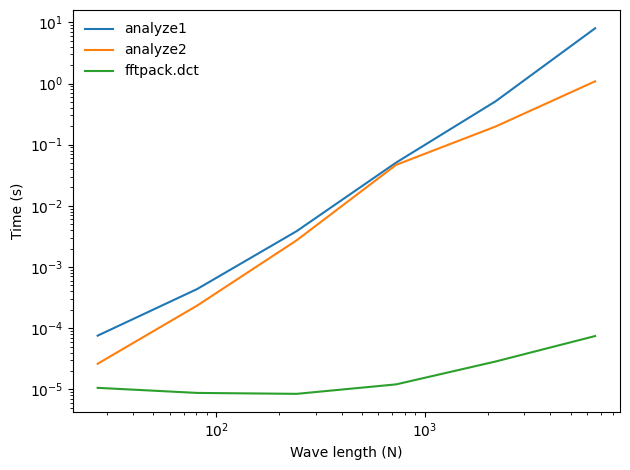

In [9]:
import matplotlib.pyplot as plt
from thinkdsp import decorate

plt.plot(ns, best_analyze1, label='analyze1')
plt.plot(ns, best_analyze2, label='analyze2')
plt.plot(ns, best_dct, label='fftpack.dct')
loglog = dict(xscale='log', yscale='log')
decorate(xlabel='Wave length (N)', ylabel='Time (s)', **loglog)

# Упражнение 6.2

In [47]:
def filter(dct,limit = 0):
    for i, amp in enumerate(dct.amps):
        if np.abs(amp) < limit:
              dct.hs[i] = 0

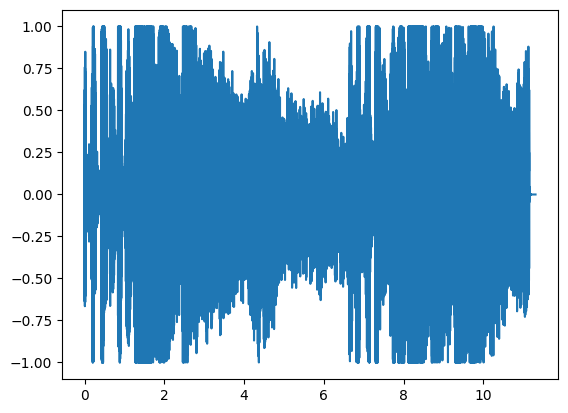

In [48]:
from thinkdsp import read_wave

wave = read_wave('metro-boomin.wav')
wave.plot()
wave.normalize()
wave.make_audio()

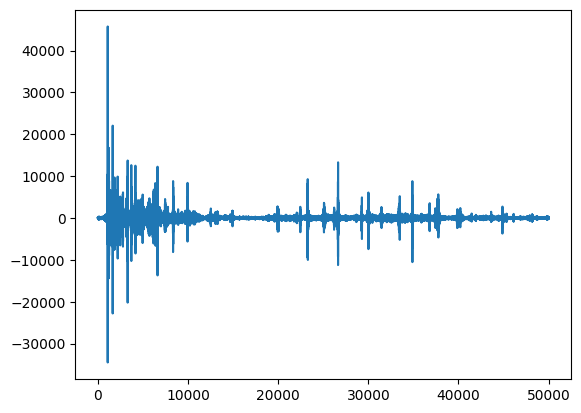

In [49]:
dct = wave.make_dct()
dct.plot(high = 50000)

In [50]:
filter(dct,500)

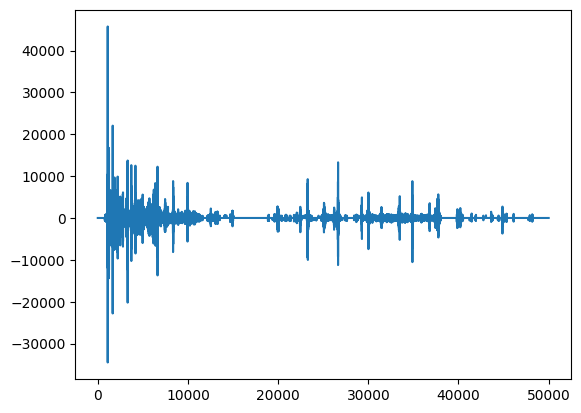

In [51]:
dct.plot(high = 50000)
dct.make_wave().make_audio()

In [52]:
filter(dct,1000)

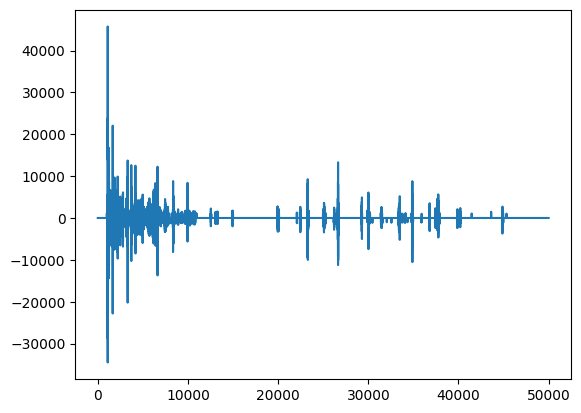

In [53]:
dct.plot(high = 50000)
dct.make_wave().make_audio()

In [54]:
filter(dct,2000)

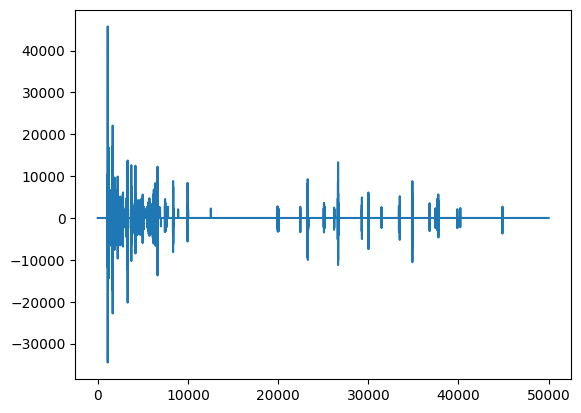

In [55]:
dct.plot(high = 50000)
dct.make_wave().make_audio()

# Упражнение 6.3

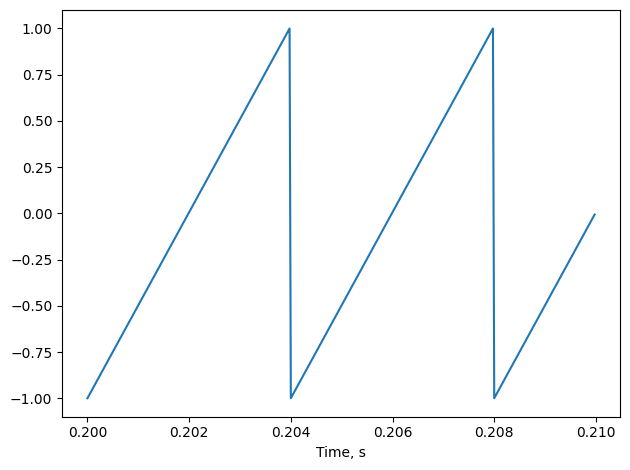

In [58]:
from thinkdsp import SawtoothSignal

signal = SawtoothSignal(freq=250, offset=0)
wave = signal.make_wave(duration=0.5, framerate=40000)
wave.segment(start=0.2,duration=0.01).plot()
decorate(xlabel='Time, s')
wave.make_audio()

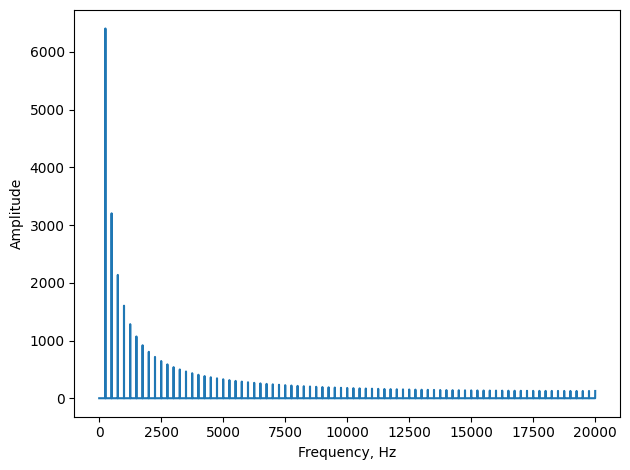

In [59]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency, Hz',
         ylabel='Amplitude')

In [60]:
def plot_angle(spectrum, thresh=1):
    angles = spectrum.angles
    angles[spectrum.amps < thresh] = np.nan
    plt.plot(spectrum.fs, angles, 'x')
    decorate(xlabel='Frequency, Hz',
             ylabel='Phase, rad')

In [61]:
def plot_three(spectrum, thresh=1):
    plt.figure(figsize=(10, 4))
    plt.subplot(1,3,1)
    spectrum.plot()
    plt.subplot(1,3,2)
    plot_angle(spectrum, thresh=thresh)
    plt.subplot(1,3,3)
    wave = spectrum.make_wave()
    wave.unbias()
    wave.normalize()
    wave.segment(duration=0.01).plot()
    display(wave.make_audio())

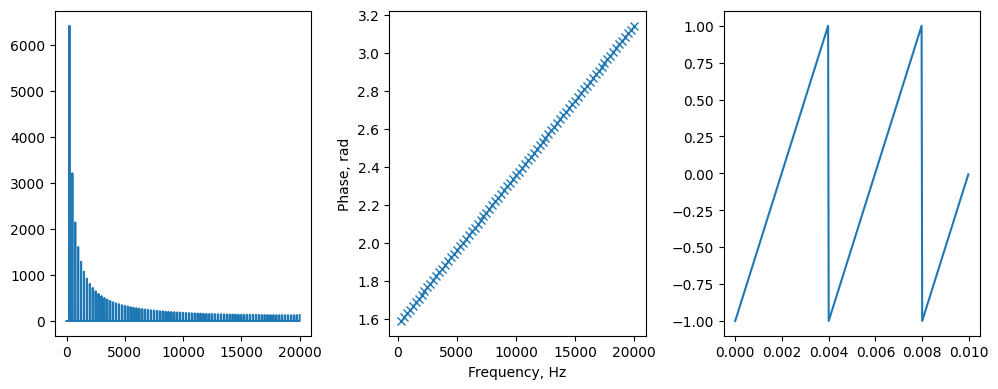

In [62]:
plot_three(spectrum)

In [63]:
def rotate_angle(spectrum, offset):
    res = spectrum.copy()
    res.hs *= np.exp(1j * offset)
    return res

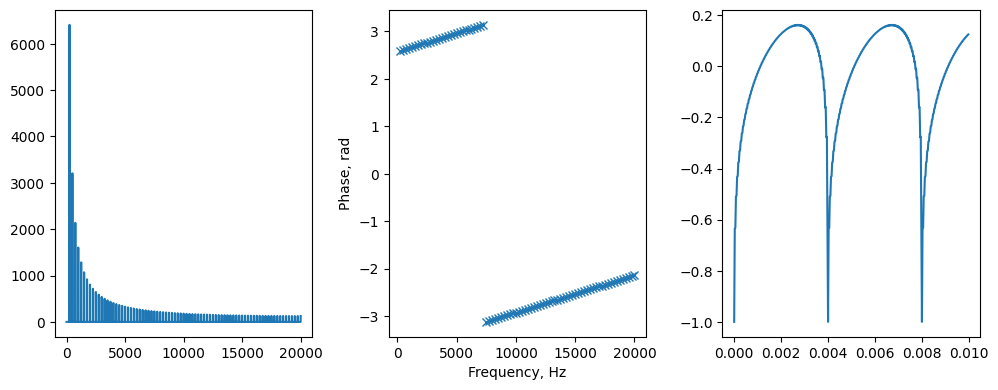

In [64]:
spectrum2 = rotate_angle(spectrum, 1)
plot_three(spectrum2)

In [65]:
def zero_angle(spectrum):
    res = spectrum.copy()
    res.hs = res.amps
    return res

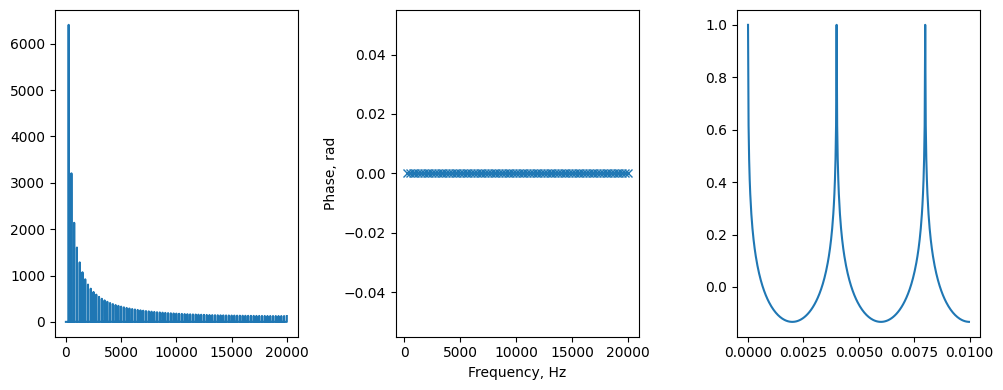

In [66]:
spectrum3 = zero_angle(spectrum2)
plot_three(spectrum3)

In [67]:
def random_angle(spectrum):
    res = spectrum.copy()
    angles = np.random.uniform(0, np.pi * 2, len(spectrum))
    res.hs *= np.exp(1j * angles)
    return res

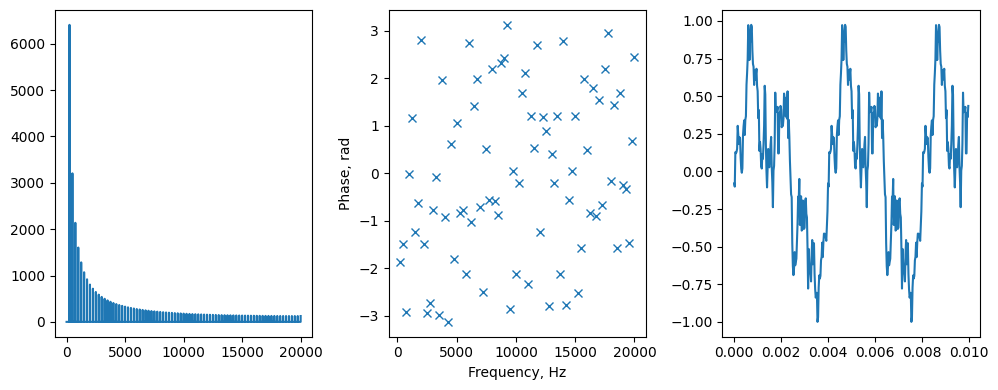

In [68]:
spectrum4 = random_angle(spectrum2)
plot_three(spectrum4)